<a href="https://colab.research.google.com/github/igornunespatricio/Python-Course/blob/main/Data%20Analysis/Mini%20Project/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules and files

In [3]:
import pandas as pd

In [4]:
employees = pd.read_csv("/content/CadastroFuncionarios.csv", sep=';', decimal=',')
clients = pd.read_csv("/content/CadastroClientes.csv", sep=';')
factServices = pd.read_excel("/content/BaseServiçosPrestados.xlsx")

In [5]:
display(employees.head(5))
display(clients.head(5))
display(factServices.head(5))

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [6]:
# remove columns
employees = employees.drop(['Estado Civil', 'Cargo'], axis=1)
display(employees.head(5))

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo


# Data Analysis

## Payroll

In [ ]:
employees['Total Salary'] = employees[['Salario Base','Impostos', 'Beneficios', 'VT', 'VR']].sum(axis=1)
display(employees.head(5))

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Total Salary
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36


In [ ]:
totalPayroll = employees['Total Salary'].sum()
print(f'Monthly payroll is: R$ {totalPayroll:,}')

Monthly payroll is: R$ 2,717,493.22


## Projected Revenue

In [ ]:
projRevenue = factServices[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clients[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')
display(projRevenue)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


In [ ]:
totalProjRevenue = (projRevenue['Tempo Total de Contrato (Meses)'] * projRevenue['Valor Contrato Mensal']).sum()
print(f'Total Projected Revenue: R${totalProjRevenue:,}.')

Total Projected Revenue: R$5,519,160.


## % of Employees With Contracts

In [11]:
numberEmployeesContract = len(factServices['ID Funcionário'].unique())
numberEmployees = len(employees['ID Funcionário'].unique())
percentEmployeesContract = numberEmployeesContract/numberEmployees
print(f'% of Employees that closed at least one contract: {percentEmployeesContract:.2%}')

% of Employees that closed at least one contract: 86.84%


##

In [12]:
## Contracts per Area (or department)
contractsPerArea = factServices[['ID Funcionário']].merge(employees[['ID Funcionário', 'Area']], on='ID Funcionário')
display(contractsPerArea)

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


In [13]:
# two different ways of calculating the same measure
display(pd.DataFrame(contractsPerArea['Area'].value_counts()))

display(
contractsPerArea.groupby('Area').agg(
    **{
        '# of Contracts': pd.NamedAgg('ID Funcionário', 'count')
    }
).reset_index()
)

,Area
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


,Area,# of Contracts
0,Administrativo,63
1,Comercial,44
2,Financeiro,42
3,Logística,40
4,Operações,48


## Employees Per Area/Department

In [8]:
employeesPerArea = employees.groupby('Area').agg(
    **{
        '# of Employees': pd.NamedAgg('ID Funcionário', 'count')
    }
)
display(employeesPerArea)

display(pd.DataFrame(employees['Area'].value_counts()))

,# of Employees
Area,
Administrativo,26
Comercial,26
Financeiro,18
Logística,21
Operações,23


,Area
Administrativo,26
Comercial,26
Operações,23
Logística,21
Financeiro,18


<Axes: xlabel='Area'>

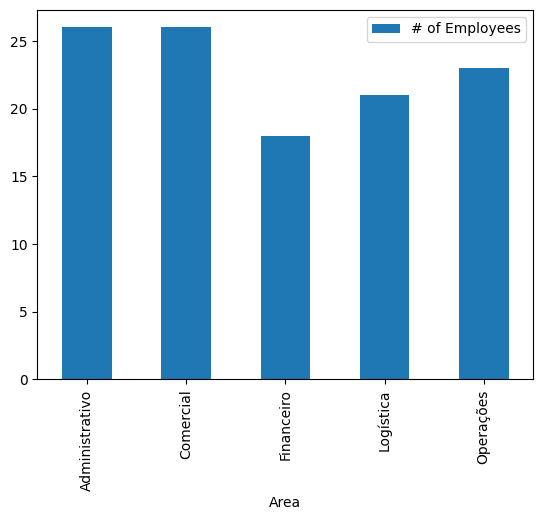

In [9]:
employeesPerArea.plot(kind='bar')

## Average Month Contract Value

In [21]:
averageMonthContractValue = clients['Valor Contrato Mensal'].mean()
print(f'The average contract value per month is R${averageMonthContractValue:,.2f}')

The average contract value per month is R$2,502.56
